<a href="https://colab.research.google.com/github/jsebastianquiroga/DEEP_LEARNING_PUJ/blob/main/Traffic_sign/notebook/Taller_2_Caicedo_Garc%C3%ADa_Quiroga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Aprendizaje Profundo.</strong></h1> 
<h2> Para: Ing. Julio Omar Palacio Niño, M.Sc.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Antonio Jose Caicedo.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>
<h2>Leonardo García.</br></h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Taller 2: Traffic Sign Classification and Recognition.</strong></h1> 

En este notebook exploraremos diferentes propuestas de redes convolucionales para el reconocimiento y clasificación de señales de tráfico. Para ello, utilizaremos el conjunto de datos "Traffic Sign Classification and Recognition", que contiene más de 6.000 imágenes etiquetadas manualmente en 10 categorías diferentes, que incluyen señales de guía, señales de velocidad máxima y señales de prioridad, entre otras.

El conjunto de datos se encuentra dividido en un conjunto de entrenamiento y un conjunto de prueba, cada uno con su respectivo archivo de anotaciones en formato JSON. En este notebook, implementaremos diferentes arquitecturas de redes convolucionales utilizando la biblioteca Keras, y evaluaremos su rendimiento en términos de precisión y pérdida.

El objetivo de este proyecto es explorar diferentes técnicas y arquitecturas de redes convolucionales para mejorar el reconocimiento y clasificación de señales de tráfico.

En el presente Notebook, se exploraran los datos del data set de Kaggel: https://www.kaggle.com/datasets/wjybuqi/traffic-sign-classification-and-recognition

Este conjunto de datos contiene 6358 etiquetas de categorías etiquetadas manualmente. Las etiquetas incluyen las 10 categorías siguientes: `GuideSign`, `M1`, `M4`, `M5`, `M6`, `M7`, `P1`, `P10_50`, `P12`, `W1`, correspondientes a diez categorías diferentes de señales de tráfico. Todos los datos se han dividido manualmente en conjunto de entrenamiento y conjunto de prueba según la proporción.

<table>
  <tr>
    <th>Categoría</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Guidesign</td>
    <td>Refiere al diseño y la colocación de señales de tráfico para guiar y orientar a los conductores y peatones en la vía pública.</td>
  </tr>
  <tr>
    <td>M1</td>
    <td>Señales de tráfico que indican la dirección a seguir, como flechas de dirección y señales de carril para la entrada y salida de carriles.</td>
  </tr>
  <tr>
    <td>M4</td>
    <td>Señales de tráfico que se colocan a lo largo de los carriles de tráfico para proporcionar información específica sobre los carriles de la carretera.</td>
  </tr>
  <tr>
    <td>M5</td>
    <td>Señales de tráfico que indican la presencia de una carretera o un camino, y las restricciones o regulaciones que se aplican a los vehículos en la misma.</td>
  </tr>
  <tr>
    <td>M6</td>
    <td>Señales de tráfico específicas para ciclistas que indican carriles o áreas exclusivas para bicicletas.</td>
  </tr>
  <tr>
    <td>M7</td>
    <td>Señales de tráfico que indican la presencia de un paso de peatones y que alertan a los conductores para reducir la velocidad y ceder el paso a los peatones.</td>
  </tr>
  <tr>
    <td>P1</td>
    <td>Señales de tráfico que indican una prohibición o restricción, como una señal de "prohibido estacionarse" o una señal de "prohibido girar a la izquierda".</td>
  </tr>
  <tr>
    <td>P10_50</td>
    <td>Señales de tráfico que indican los límites de velocidad máxima en una determinada carretera o calle.</td>
  </tr>
  <tr>
    <td>P12</td>
    <td>Señales de tráfico que indican una cortesía o sugerencia, como una señal de "cambio de carril sugerido" o una señal de "ceda el paso".</td>
  </tr>
  <tr>
    <td>W1</td>
    <td>Señales de tráfico que indican peligros o advertencias en la carretera, como señales de "curva peligrosa" o señales de "cruce de animales".</td>
  </tr>
</table>

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> Cargue y preparación del data set  </li>
<li> Exploración del data set y su comprención. </li>
<li> Modelo 1: </li>
<li> Modelo 2.</li>
<li> Analisis de resultados redes.</li>
<li> Bono.</li>
</ol>

 <a id="carque"></a>
# 1. Cargue del data set.

In [36]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [37]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed May  3 18:39:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    34W /  70W |  14541MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:


# Importar las liobrerías y paquetes
import os
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

from matplotlib.image import imread
# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Las imágenes que se utilizarán en este proyecto ya han sido segmentadas previamente en la competencia de Kaggle. Para su uso en este proyecto, las imágenes han sido cargadas en un drive público. Se cargarán las bases de datos tal como fueron proporcionadas en la competencia.

In [39]:
folder = '18VNhiT-PPcYOsfpX1TN66ektcXl3BShn'
download = drive.CreateFile({'id': folder})
download.GetContentFile('traffic-sings.zip') # Guarda las imagenes en un archivo temporal

!unzip -qn traffic-sings.zip -d dataset | head -n 5


PATH = '/content/dataset'

print(os.listdir(PATH))

train_dir = os.path.join(PATH, 'train_dataset', 'train')
test_dir = os.path.join(PATH, 'test_dataset', 'test')

['submit_example.json', 'train_dataset', 'test_dataset']


El código descarga un archivo zip de un conjunto de datos sobre señales de tráfico desde Google Drive. Luego descomprime el archivo en una carpeta llamada "dataset". Se establece el directorio de entrenamiento y prueba para el modelo y se definen los parámetros para el preprocesamiento de imágenes utilizando ImageDataGenerator. En particular, las imágenes se escalan entre 0 y 1 y se establece el parámetro class_mode en "categorical" para admitir múltiples clases. Finalmente, se utiliza flow_from_directory para crear generadores de lotes de datos para entrenamiento y prueba.

In [40]:
from keras.preprocessing.image import ImageDataGenerator 

#valores  de entrada:

pixel= 224 #imagenes de 150 pixeles
size=20
epocas=25
batch = 200


train_val_generator = ImageDataGenerator(rescale=1./255, validation_split=0.05) #escalar entre 0-1 # se saca el 5% de train para validación
test_datagen = ImageDataGenerator(rescale = 1./255) #escalar entre 0-1

In [41]:
train_generator = train_val_generator.flow_from_directory(
    train_dir,            # Directorio que contiene las imágenes de entrenamiento
    target_size=(pixel, pixel), # Tamaño de la imagen después de reescalarla
    color_mode="rgb",        # Tipo de imagen: RGB o grayscale
    batch_size=batch,        # Número de imágenes por lote generado por el generador
    class_mode='categorical',# Categórico para múltiples clases, binario para dos clases
    subset='training'        #creación de validación o test
)

val_generator = train_val_generator.flow_from_directory(
    train_dir,            # Directorio que contiene las imágenes de entrenamiento
    target_size=(pixel, pixel), # Tamaño de la imagen después de reescalarla
    color_mode="rgb",        # Tipo de imagen: RGB o grayscale
    batch_size=batch,        # Número de imágenes por lote generado por el generador
    class_mode='categorical',# Categórico para múltiples clases, binario para dos clases
    subset='validation'   #creación de validación o test
)
test_generator = test_datagen.flow_from_directory(
    test_dir,             # Directorio que contiene las imágenes de test
    target_size=(pixel, pixel),    # Tamaño de la imagen después de reescalarla
    color_mode="rgb",       # Tipo de imagen: RGB o grayscale
    batch_size=batch,        # Número de imágenes por lote generado por el generador
    class_mode='categorical',   # Categórico para múltiples clases, binario para dos clases
    shuffle=True,           # Mezcla el orden de las imágenes producidas
    seed=42                 # Semilla aleatoria para reproducibilidad
)

Found 5728 images belonging to 10 classes.
Found 296 images belonging to 10 classes.
Found 324 images belonging to 10 classes.


Son un total de 6348 imagenes, donde se tendran solo 324 como test, y se crea un data set de validación adicional para poder analisar posibles sobre entrenamientos

<a id="carque"></a>
# 2. Exploración del data set y su comprención 

In [42]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def get_random_image_from_each_label(root_dir, num_labels=10):
    """
    Obtener una imagen aleatoria de cada etiqueta (subdirectorio) en el directorio raíz.
    root_dir: Directorio raíz que contiene los subdirectorios con las imágenes.
    num_labels: Número de etiquetas a considerar.
    """

    # Obtener una lista de los nombres de los subdirectorios
    subdirs = os.listdir(root_dir)

    # Seleccionar aleatoriamente num_labels subdirectorios
    random_subdirs = random.sample(subdirs, num_labels)

    # Inicializar una lista para almacenar las rutas de las imágenes seleccionadas
    selected_images = []

    # Iterar sobre los subdirectorios seleccionados
    for subdir in random_subdirs:
        # Obtener una lista de las rutas de las imágenes en el subdirectorio actual
        image_paths = [os.path.join(root_dir, subdir, filename) for filename in os.listdir(os.path.join(root_dir, subdir))]
        # Seleccionar aleatoriamente una imagen
        selected_image_path = random.choice(image_paths)
        # Agregar la ruta de la imagen seleccionada a la lista de imágenes seleccionadas
        selected_images.append(selected_image_path)

    # Cargar las imágenes seleccionadas en una matriz numpy
    images = []
    for image_path in selected_images:
        image = plt.imread(image_path)
        images.append(image)
    images = np.array(images)

    return images

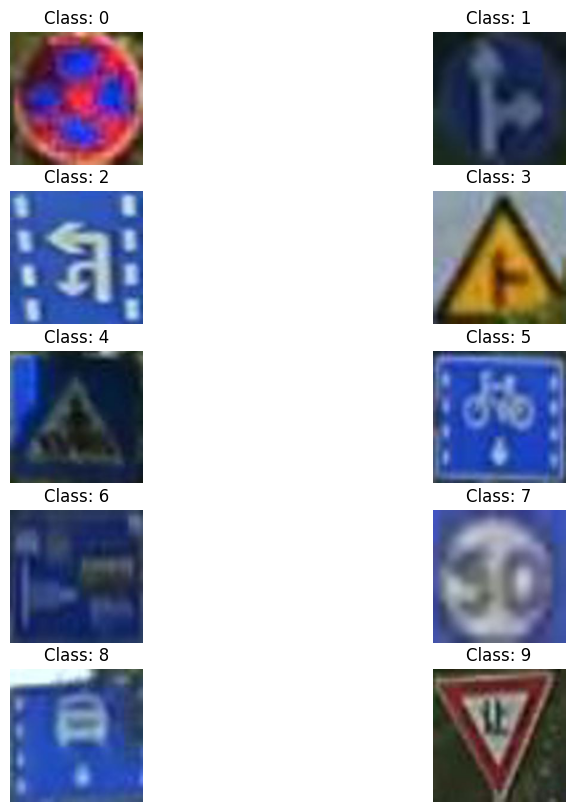

In [43]:
# Obtener un lote de imágenes aleatorias de cada etiqueta
random_images = get_random_image_from_each_label('dataset/train_dataset/train')

# Visualizar las imágenes con sus respectivas etiquetas
plt.figure(figsize=(10, 10))
for i in range(len(random_images)):
    plt.subplot(5, 2, i+1)
    plt.imshow(random_images[i])
    plt.title("Class: " + str(i))
    plt.axis('off')
plt.show()


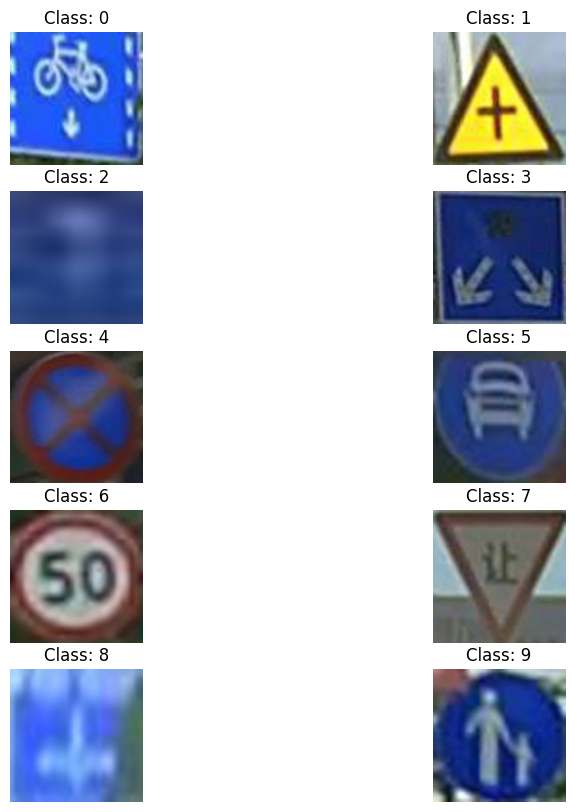

In [44]:
# Obtener un lote de imágenes aleatorias de cada etiqueta
random_images = get_random_image_from_each_label('dataset/test_dataset/test')

# Visualizar las imágenes con sus respectivas etiquetas
plt.figure(figsize=(10, 10))
for i in range(len(random_images)):
    plt.subplot(5, 2, i+1)
    plt.imshow(random_images[i])
    plt.title("Class: " + str(i))
    plt.axis('off')
plt.show()



El conjunto de entrenamiento consta de 6024 imágenes y el conjunto de prueba de 324 imágenes, cada una de tamaño 224 píxeles. Al analizar los conjuntos de datos, se observan diferencias en colores y formas, así como una resolución ligeramente inferior en algunas imágenes. El conjunto de datos se divide en un total de 10 categorías, cada una con su nombre correspondiente: GuideSign, M1, M4, M5, M6, M7, P1, P10_50, P12 y W1. Para facilitar el procesamiento, se han reemplazado los nombres de las categorías por números del 0 al 9, siguiendo el mismo orden.

In [45]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Directorio que contiene las imágenes
root_dir  = 'dataset/train_dataset/train'

# Inicializa variables para contabilizar información del dataset
num_images = 0
image_sizes = set()

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Carga la imagen
            img_path = os.path.join(subdir, filename)
            img = Image.open(img_path)

            # Contabiliza el número de imágenes y sus tamaños
            num_images += 1
            image_sizes.add(img.size)

# Imprime información del dataset
print(f'Número total de imágenes: {num_images}')
print(f'Tamaños de imágenes: {image_sizes}')


Número total de imágenes: 6024
Tamaños de imágenes: {(224, 224)}


Text(0.5, 1.0, 'Participación acumulada por clase TRAIN')

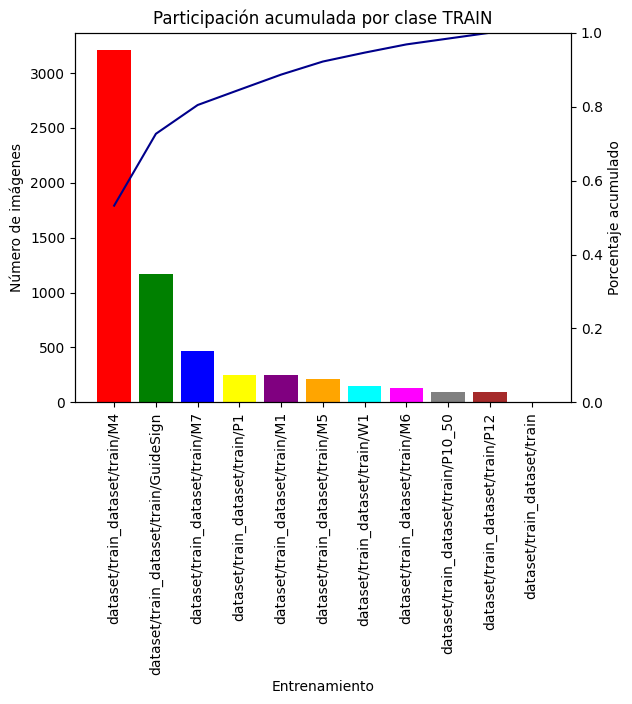

In [46]:
import matplotlib.pyplot as plt
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir  = 'dataset/train_dataset/train'

# Inicializa un diccionario para contabilizar el número de imágenes por carpeta
num_images_per_folder = {}

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa un contador de imágenes para el subdirectorio actual
    num_images = 0

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Incrementa el contador de imágenes
            num_images += 1

    # Agrega la cantidad de imágenes contabilizadas al diccionario
    num_images_per_folder[subdir] = num_images

# Ordena el diccionario por el número de imágenes de mayor a menor
sorted_folders = sorted(num_images_per_folder.items(), key=lambda x: x[1], reverse=True)

# Calcula los porcentajes y acumulados en una lista
percentages = []
cumulative_percentage = 0
for folder in sorted_folders:
    percentage = folder[1] / sum(num_images_per_folder.values())
    percentages.append(percentage)
    cumulative_percentage += percentage

# Crea un gráfico de barras que muestra el número de imágenes por carpeta
# Crea un gráfico de barras que muestra el número de imágenes por carpeta
fig, ax1 = plt.subplots()

ax1.bar(range(len(sorted_folders)), [folder[1] for folder in sorted_folders], align='center', color=['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'gray', 'brown'])
ax1.set_xticks(range(len(sorted_folders)))
ax1.set_xticklabels([folder[0] for folder in sorted_folders], rotation=90)
ax1.set_xlabel('Entrenamiento')
ax1.set_ylabel('Número de imágenes')

# Agrega una línea con el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_folders)), np.cumsum(percentages), color='darkblue')
ax2.set_ylabel('Porcentaje acumulado')
ax2.set_ylim([0, 1])

plt.title('Participación acumulada por clase TRAIN')


## 

La clase mayoritaria en entrenamiento es la clase M4 que cuenta con mas del 50%, las tres primeras clases encapsulan el 80% del total de observaciones.

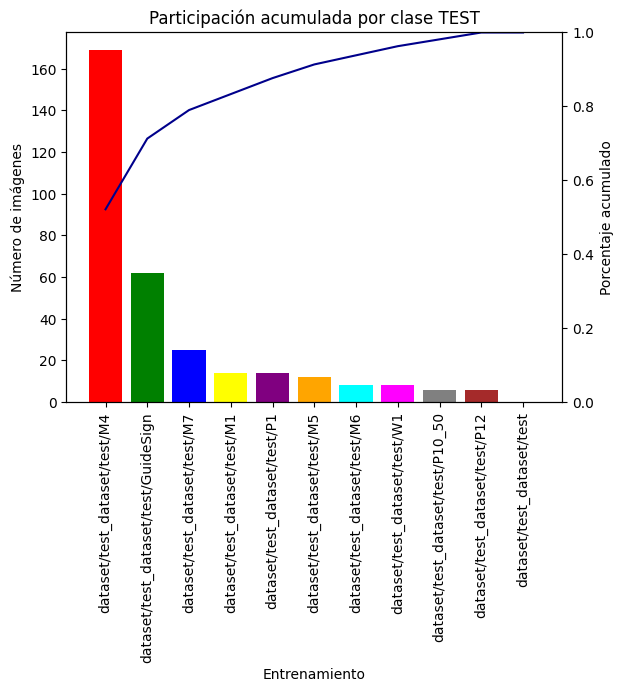

In [47]:
import matplotlib.pyplot as plt
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir  = 'dataset/test_dataset/test'

# Inicializa un diccionario para contabilizar el número de imágenes por carpeta
num_images_per_folder = {}

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa un contador de imágenes para el subdirectorio actual
    num_images = 0

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Incrementa el contador de imágenes
            num_images += 1

    # Agrega la cantidad de imágenes contabilizadas al diccionario
    num_images_per_folder[subdir] = num_images

# Ordena el diccionario por el número de imágenes de mayor a menor
sorted_folders = sorted(num_images_per_folder.items(), key=lambda x: x[1], reverse=True)

# Calcula los porcentajes y acumulados en una lista
percentages = []
cumulative_percentage = 0
for folder in sorted_folders:
    percentage = folder[1] / sum(num_images_per_folder.values())
    percentages.append(percentage)
    cumulative_percentage += percentage

# Crea un gráfico de barras que muestra el número de imágenes por carpeta
fig, ax1 = plt.subplots()
ax1.bar(range(len(sorted_folders)), [folder[1] for folder in sorted_folders], align='center', color=['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'gray', 'brown'])
ax1.set_xticks(range(len(sorted_folders)))
ax1.set_xticklabels([folder[0] for folder in sorted_folders], rotation=90)
ax1.set_xlabel('Entrenamiento')
ax1.set_ylabel('Número de imágenes')

# Agrega una línea con el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_folders)), np.cumsum(percentages), color='darkblue')
ax2.set_ylabel('Porcentaje acumulado')
ax2.set_ylim([0, 1])

plt.title('Participación acumulada por clase TEST')

plt.show()

Se mantiene la misma proporcion que el las imagenes de entrenameinto.

# 3. Modelo 1.

Este es un ejemplo de una arquitectura de red neuronal convolucional comúnmente utilizada en tareas de clasificación de imágenes. La arquitectura incluye varias capas diferentes, cada una con una función específica:

Una capa convolucional con 32 detectores de características, tamaño de kernel de 5x5, función de activación ReLU y panding. Esta capa se encarga de extraer características importantes de la imagen de entrada mediante la convolución con los detectores de características.
Una capa de max pooling de tamaño 5x5. Esta capa reduce la resolución espacial de las características extraídas por la capa convolucional, lo que reduce la cantidad de parámetros y la cantidad de cálculos necesarios en las capas siguientes.
Una capa de flattening. Esta capa convierte las características bidimensionales en un vector unidimensional, lo que permite que la información fluya desde la capa convolucional y de pooling hacia las capas completamente conectadas.
Una capa completamente conectada con 100 neuronas y función de activación ReLU. Esta capa procesa el vector de características unidimensional generado por la capa de flattening para producir características más abstractas y significativas para la tarea de clasificación.
Una capa de salida con el mismo número de clases a clasificar y función de activación softmax. Esta capa produce una distribución de probabilidad sobre las diferentes clases, lo que permite que la red determine la clase más probable para la imagen de entrada.

In [48]:
import tensorflow as tf

model_1 = tf.keras.models.Sequential()

# Añadimos la primera capa
model_1.add(tf.keras.layers.Conv2D(32,(5,5), strides=(1,1), activation = 'relu', padding='same',input_shape = (pixel, pixel, 3)))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size = (5,5)))

# Hacemos un flatten para poder usar una red fully connected con 100 neuronas
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(100, activation='relu'))

# Añadimos una capa softmax para que podamos clasificar las imágenes
model_1.add(tf.keras.layers.Dense(units= 10, activation='softmax'))

model_1.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 61952)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               6195300   
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,198,742
Trainable params: 6,198,742
Non-trainable params: 0
____________________________________________

Con el animo de que la experiencia sea rapida en pro del entrenamiento, se comentara el siguiente bloque de codigo, donde se entrena el modelo, ya esta guardado dentro del repositorio.

In [49]:
# # Compile the model
# model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model / modelo entrenado y guardado en pro de tiempo se comenta entrenamiento y se carga modelo con caracteristicas
# Entrenamiento1 = model_1.fit(
#               train_generator,
#               epochs = epocas,
#               validation_data=(val_generator),
#               steps_per_epoch = train_generator.n // batch
#           )
# import os
# import tensorflow as tf


# import shutil

# # Directorio donde se guarda el modelo
# model_dir = '/content/my_saved_rnn_model'

# # Eliminar la carpeta si ya existe
# if os.path.exists(model_dir):
#     shutil.rmtree(model_dir)

# # Crear la carpeta
# os.makedirs(model_dir)

# # Guardar el modelo
# model_1.save(model_dir)

# # Directorio donde se va a guardar el archivo zip
# zip_dir = 'my_saved_rnn_model'

# # Comprimir el modelo en formato zip
# shutil.make_archive(zip_dir, 'zip', model_dir)

# file_list = drive.ListFile({'q':"'1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd' in parents and trashed=false"}).GetList()
# for file in file_list:
#     if file['title'] == 'my_saved_rnn_model.zip':
#         file.Delete()
#     if file['title'] == 'Entrenamiento1.csv':
#         file.Delete()

# # Subir el archivo zip a Google Drive
# zip_file = drive.CreateFile({'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})
# zip_file.SetContentFile('my_saved_rnn_model.zip')
# zip_file.Upload({'convert': True})

# # Exportar Entrenamiento1 como archivo CSV
# import pandas as pd
# df = pd.DataFrame.from_dict(Entrenamiento1.history)
# csv_file = 'Entrenamiento1.csv'
# df.to_csv(csv_file, index=False)

# # Crear el objeto file y establecer los padres como la carpeta de destino
# csv_drive_file = drive.CreateFile({'title': csv_file, 'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})

# # Establecer el contenido del archivo y subirlo a Drive
# csv_drive_file.SetContentFile(csv_file)
# csv_drive_file.Upload()

# # Mover Entrenamiento1.csv a la misma carpeta que el modelo
# shutil.move(csv_file, model_dir)

Epoch 1/25
28/28 [==============================] - 16s 537ms/step - loss: 1.5140 - accuracy: 0.6075 - val_loss: 0.6130 - val_accuracy: 0.8243
Epoch 2/25
28/28 [==============================] - 15s 539ms/step - loss: 0.4950 - accuracy: 0.8598 - val_loss: 0.3801 - val_accuracy: 0.8716
Epoch 3/25
28/28 [==============================] - 15s 527ms/step - loss: 0.3333 - accuracy: 0.9039 - val_loss: 0.3364 - val_accuracy: 0.8953
Epoch 4/25
28/28 [==============================] - 15s 526ms/step - loss: 0.2709 - accuracy: 0.9275 - val_loss: 0.2677 - val_accuracy: 0.9088
Epoch 5/25
28/28 [==============================] - 15s 525ms/step - loss: 0.2167 - accuracy: 0.9390 - val_loss: 0.2704 - val_accuracy: 0.9088
Epoch 6/25
28/28 [==============================] - 15s 527ms/step - loss: 0.1964 - accuracy: 0.9457 - val_loss: 0.2505 - val_accuracy: 0.9155
Epoch 7/25
28/28 [==============================] - 15s 531ms/step - loss: 0.1800 - accuracy: 0.9484 - val_loss: 0.2040 - val_accuracy: 0.9223

'/content/my_saved_rnn_model/Entrenamiento1.csv'

Este código se encarga de descargar un archivo .zip desde Google Drive y descomprimirlo en una carpeta de Colab, y luego cargar el modelo Keras desde la carpeta descomprimida.

Si no necesitas descargar el archivo nuevamente desde Google Drive, puedes comentar el primer bloque de código, y si ya tienes el archivo .zip en la carpeta de Colab, puedes comentar la línea download_file.GetContentFile(file_name) y modificar la ruta del archivo en la línea !unzip -q -o /content/my_saved_rnn_model.zip -d /content/ para que apunte al archivo correcto.

In [50]:
folder_id = '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'  # ID de la carpeta
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
file_name = 'my_saved_rnn_model.zip'
file_id = None
for file in file_list:
    if file['title'] == file_name:
        file_id = file['id']
        break
download_file = drive.CreateFile({'id': file_id})
download_file.GetContentFile(file_name)


cnn_folder = "/content/"
!unzip -q -o /content/my_saved_rnn_model.zip -d /content/

print(os.listdir(PATH)) 
trained_model = os.path.join(PATH, 'my_saved_rnn_model')
from tensorflow.keras.models import load_model

model_path = '/content/my_saved_rnn_model'  # Ruta donde se descomprimió el modelo
loaded_model = load_model(model_path)


entrenamiento_file_name = 'Entrenamiento1.csv'
entrenamiento_file_id = None
for file in file_list:
    if file['title'] == entrenamiento_file_name:
        entrenamiento_file_id = file['id']
        break
entrenamiento_file = drive.CreateFile({'id': entrenamiento_file_id})
entrenamiento_file.GetContentFile(entrenamiento_file_name)
entrenamiento_df = pd.read_csv(entrenamiento_file_name)

['submit_example.json', 'train_dataset', 'test_dataset']


Se valida que cumpla con la misma arquitectura construida

In [52]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 61952)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               6195300   
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,198,742
Trainable params: 6,198,742
Non-trainable params: 0
____________________________________________

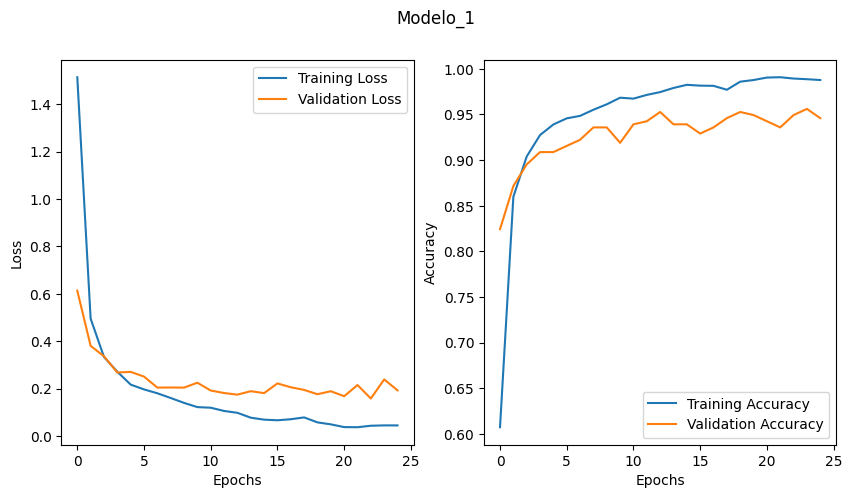

In [60]:
import matplotlib.pyplot as plt

# Obtener los datos de entrenamiento
train_loss = entrenamiento_df.loc[:, 'loss']
val_loss = entrenamiento_df.loc[:, 'val_loss']
train_acc = entrenamiento_df.loc[:, 'accuracy']
val_acc = entrenamiento_df.loc[:, 'val_accuracy']

# Crear la figura
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Modelo_1')

# Graficar la curva de pérdida de entrenamiento y validación
axs[0].plot(train_loss, label='Training Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Graficar la curva de exactitud de entrenamiento y validación
axs[1].plot(train_acc, label='Training Accuracy')
axs[1].plot(val_acc, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()


In [58]:
test_loss, test_acc = loaded_model.evaluate(test_generator) 
val_loss, val_acc = loaded_model.evaluate_generator(val_generator, steps=train_generator.n // batch)
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_acc:.4f}')
print('_____________________________________')
print(f'Test loss: {test_loss:.4f}') 
print(f'Test accuracy: {test_acc:.4f}')

2/2 [==============================] - 1s 339ms/step - loss: 0.3045 - accuracy: 0.9414


<ipython-input-58-e025dcc65367>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_acc = loaded_model.evaluate_generator(val_generator, steps=train_generator.n // batch)


Validation loss: 0.1924
Validation accuracy: 0.9459
_____________________________________
Test loss: 0.3045
Test accuracy: 0.9414


# 4. Modelo 2.

<html>
  <p>Se va a realizar una red neuronal convolucional con las siguientes características para la construcción del clasificador en un segundo parámetro de configuración:</p>
  <ul>
    <li>Capa convolucional con 48 detectores de características, tamaño de kernel de 3x3, función de activación lineal rectificada (ReLU) de paso 1 y con panding.</li>
    <li>Capa de max pooling de tamaño 2x2.</li>
    <li>Capa convolucional con 96 detectores de características, tamaño de kernel de 3x3, función de activación lineal rectificada (ReLU) de paso 1 y con panding.</li>
    <li>Capa de max pooling de tamaño 2x2.</li>
    <li>Capa de Flattening.</li>
    <li>Capa full conectada con 100 neuronas y función de activación lineal rectificada (ReLU).</li>
    <li>Capa full conectada con 100 neuronas y función de activación lineal rectificada (ReLU).</li>
    <li>Capa de salida del mismo número de las clases a clasificar y función de activación softmax.</li>
  </ul>
  <p>La red convolucional descrita tiene una arquitectura típica para la clasificación de imágenes, en la que se utilizan capas convolucionales para detectar características y capas de max pooling para reducir la dimensionalidad de la imagen. Luego se utilizan capas totalmente conectadas para realizar la clasificación final. Con esta arquitectura, se espera obtener buenos resultados en la clasificación de imágenes con un conjunto de datos apropiado y un entrenamiento adecuado.</p>
</html>

In [61]:
model_2 = tf.keras.models.Sequential()

# Añadimos la primera capa
model_2.add(tf.keras.layers.Conv2D(48,(3,3), strides=(1,1), activation = 'relu', padding='same',input_shape = (224,224,3)))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Añadimos la segunda capa
model_2.add(tf.keras.layers.Conv2D(96,(3,3), strides=(1,1), activation = 'relu', padding='same',input_shape = (224,224,3)))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Hacemos un flatten para poder usar una red fully connected con 100 neuronas
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(100, activation='relu'))

# Añadimos una capa softmax para que podamos clasificar las imágenes
model_2.add(tf.keras.layers.Dense(units= 10, activation='softmax'))

model_2.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 48)      1344      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 48)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 96)      41568     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 96)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 301056)            0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [62]:
# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
entrenamiento2 = model_2.fit(
    train_generator,
    epochs=epocas,
    validation_data=(val_generator),
    steps_per_epoch = train_generator.n // batch
)
import os
import tensorflow as tf


import shutil

# Directorio donde se guarda el modelo
model_2_dir = '/content/my_saved_rnn_model_2'

# Eliminar la carpeta si ya existe
if os.path.exists(model_2_dir):
    shutil.rmtree(model_2_dir)

# Crear la carpeta
os.makedirs(model_2_dir)

# Guardar el modelo
model_1.save(model_2_dir)

# Directorio donde se va a guardar el archivo zip
zip_dir_2 = 'my_saved_rnn_model_2'

# Comprimir el modelo en formato zip
shutil.make_archive(zip_dir_2, 'zip', model_2_dir)

file_list = drive.ListFile({'q':"'1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd' in parents and trashed=false"}).GetList()
for file in file_list:
    if file['title'] == 'my_saved_rnn_model_2.zip':
        file.Delete()
    if file['title'] == 'entrenamiento2.csv':
        file.Delete()

# Subir el archivo zip a Google Drive
zip_file = drive.CreateFile({'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})
zip_file.SetContentFile('my_saved_rnn_model_2.zip')
zip_file.Upload({'convert': True})

# Exportar Entrenamiento2 como archivo CSV
import pandas as pd
df = pd.DataFrame.from_dict(entrenamiento2.history)
csv_file_2 = 'entrenamiento2.csv'
df.to_csv(csv_file_2, index=False)

# Crear el objeto file y establecer los padres como la carpeta de destino
csv_drive_file = drive.CreateFile({'title': csv_file_2, 'parents': [{'id': '1DsobrlIFWI7g4W5Mwd8E6m9HsW_4xmEd'}]})

# Establecer el contenido del archivo y subirlo a Drive
csv_drive_file.SetContentFile(csv_file_2)
csv_drive_file.Upload()

# Mover Entrenamiento1.csv a la misma carpeta que el modelo
shutil.move(csv_file_2, model_2_dir)

Epoch 1/25
28/28 [==============================] - 31s 813ms/step - loss: 2.0260 - accuracy: 0.6226 - val_loss: 0.4919 - val_accuracy: 0.8514
Epoch 2/25
28/28 [==============================] - 17s 580ms/step - loss: 0.4210 - accuracy: 0.8826 - val_loss: 0.3648 - val_accuracy: 0.8851
Epoch 3/25
28/28 [==============================] - 17s 582ms/step - loss: 0.2939 - accuracy: 0.9184 - val_loss: 0.3187 - val_accuracy: 0.9054
Epoch 4/25
28/28 [==============================] - 17s 585ms/step - loss: 0.2302 - accuracy: 0.9351 - val_loss: 0.2967 - val_accuracy: 0.9189
Epoch 5/25
28/28 [==============================] - 17s 580ms/step - loss: 0.1910 - accuracy: 0.9436 - val_loss: 0.2370 - val_accuracy: 0.9054
Epoch 6/25
28/28 [==============================] - 16s 578ms/step - loss: 0.1443 - accuracy: 0.9571 - val_loss: 0.2329 - val_accuracy: 0.9257
Epoch 7/25
28/28 [==============================] - 16s 576ms/step - loss: 0.1180 - accuracy: 0.9678 - val_loss: 0.2513 - val_accuracy: 0.9358

NameError: ignored